In [1]:
### Calculate new infer
from vdsm_util import get_blob_client, get_blobnames
from io import BytesIO, StringIO
from pyproj import Transformer
import pickle as pkl
import numpy as np

import time
import datetime
from dateutil.relativedelta import relativedelta
from azure.storage.blob import BlobServiceClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from azureml.core.run import Run
import scipy
import xarray as xr

import random
from sklearn.metrics import r2_score, accuracy_score
from azureml.core import Workspace
from azureml.core.authentication import MsiAuthentication
msi_auth = MsiAuthentication()

ws = Workspace(subscription_id="7704663e-8944-4300-b951-6462d41ab638", # put in .json
resource_group="arg-rt-pacedev-SpaceTech", # also in .json
workspace_name="aml-WS-spacetech001", # also
auth=msi_auth
)

keyvault = ws.get_default_keyvault()
conn_str = keyvault.get_secret("asartpacedevstvdsm001-connstr")

In [ ]:
# import xarray as xr


In [ ]:
# ## online run
# # run = Run.get_context()
# # conn_str = run.get_secret("asartpacedevstvdsm001-connstr")
# random_select = 20000
# veg_type = 'pv'
# f_year = '2021'
# f_prev_month = '01'
# month_model = 3
# last_col_name = f'pred_{month_model}mon'
# f_truth_month = 4  # to delta
# f_truth_year = 2021 # to delta
# infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'



In [ ]:
# infer_csvfolder

In [ ]:
# blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
# df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
# blob_client = BlobServiceClient.from_connection_string(conn_str)
# container_client = blob_client.get_container_client("data")

# # blob_names = list(container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/'))
# blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')

# truth_df = pd.DataFrame()
# for blob_name in blob_names:  ## to do random selection instead
#     blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
#     df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
#     truth_df = truth_df.append(df)

# random_df_truth = truth_df.sample(n=random_select, replace=False)
# random_df_truth_compare = random_df_truth[['filename', 'lat', 'lon', 'evi']]
# df_infer_compare = df_infer[['chainage_name', 'latitude', 'longitude', last_col_name]]


In [ ]:
# df_infer_compare = df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'})
# df_infer_compare.head()


In [ ]:
# # df_join_inner = random_df_truth_compare.merge(df_infer_compare, suffixes=("_truth", "_infer"), how='outer', on=['filename','lat', 'lon'], indicator=True)
# df_join_inner = random_df_truth_compare.merge(df_infer_compare, suffixes=("_truth", "_infer"), how='outer', right_on=['chainage_name','latitude', 'longitude'],
#                                                     left_on=['filename','lat', 'lon'], indicator=True)

In [ ]:
df_join_inner.head()

In [ ]:
# random_select = 16000
# veg_type = 'pv'
# f_year = '2021'
# f_prev_month = '01'

# fig, ax = plt.subplots(3,3, figsize=(10,10))

# i=0
# # for month_model in [3, 6]:
# for month_model in [3]:
#     for veg_type in ['pv']:

#     # for veg_type in ['pv', 'npv', 'bs']:
#         last_col_name = f'pred_{month_model}mon'
#         if month_model == 3:
#             f_truth_month = 4  # to delta
#             f_truth_year = 2021 # to delta
#         if month_model == 6:
#             f_truth_month = 7  # to delta
#             f_truth_year = 2021
#         if month_model == 12:
#             f_truth_month = 1  # to delta
#             f_truth_year = 2022
#         infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'

#         blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
#         df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
#         df_infer.info()
        
#         blob_client = BlobServiceClient.from_connection_string(conn_str)
#         container_client = blob_client.get_container_client("data")
#         blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
#         # blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

#         truth_df = pd.DataFrame()
#         for blob_name in blob_names:  ## to do random selection instead
#             blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
#             df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
#             truth_df = truth_df.append(df)

In [ ]:
# truth_df.info()

In [ ]:
# random_df_truth = truth_df   #.sample(n=random_select, replace=False)
# random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
# df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

# df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'}, inplace=True)
# df_infer_compare['lat'] = df_infer_compare['lat'].astype('object')
# df_infer_compare['lon'] = df_infer_compare['lon'].astype('object')


In [ ]:
# random_df_truth_compare['lat'] = random_df_truth_compare['lat'].astype('object')
# random_df_truth_compare['lon'] = random_df_truth_compare['lon'].astype('object')
# random_df_truth_compare.info()

In [ ]:
# df_join_inner = pd.merge(left=random_df_truth_compare, 
#                             right=df_infer_compare, how='inner', 
#                                             left_on=['filename','lat', 'lon'], 
#                                             right_on = ['filename','lat', 'lon'], 
#                                             copy=True, indicator=True,
#                                             suffixes=('_truth', '_infer'))




In [ ]:
# df_join_inner.head()

In [ ]:
# df_join_inner_clean = df_join_inner.dropna()
# df_join_inner_clean.info()

In [ ]:
# print('---------')
# ### Bin EVI values into 4 bands to mimic PCI
# # bins = [0, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.55, 0.6]
# bins = [0, 0.2, 0.4, 0.6, 0.8]  

# names2 = list(range(len(bins)-1))
# df_join_inner_clean['pred_band'] = pd.cut(df_join_inner_clean[last_col_name], bins, labels=names2)
# df_join_inner_clean['actual_band'] = pd.cut(df_join_inner_clean['evi'], bins, labels=names2)


In [ ]:
# df_join_inner_clean.head()

# y_pred = df_join_inner_clean['pred_band'].astype('int')
# y_true = df_join_inner_clean['actual_band'].astype('int')

In [ ]:

# # cond = y_pred['pred_band'] > 0
# # acc =  accuracy_score(y_true[cond], y_pred[cond])
# cond = (y_pred > 0) & (y_true > 0)
# acc =  accuracy_score(y_true[cond], y_pred[cond])
# print("Acc: " + veg_type + " " + str(month_model) + " months: " + f'{acc:.2f}')

# r2 = r2_score(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name])
# print("R2: "  + veg_type + " " + str(month_model) + " months: " +  f'{r2:.2f}')

In [4]:
df_join_inner

filename      lat      lon       evi  pred_12mon _merge
0      BM; TP; YA_251_251.csv -22.4274  117.697  0.157436    0.302700   both
1      BM; TP; YA_251_251.csv -22.4272  117.695  0.102272    0.161219   both
2      BM; TP; YA_251_251.csv -22.4331  117.695  0.133106    0.184447   both
3      BM; TP; YA_251_251.csv  -22.429  117.697  0.163372    0.226381   both
4      BM; TP; YA_251_251.csv  -22.425  117.695  0.110345    0.188890   both
...                       ...      ...      ...       ...         ...    ...
20408          YA_447_449.csv  -22.787  119.186  0.090447    0.186764   both
20409          YA_447_449.csv -22.7792   119.19  0.108504    0.224912   both
20410          YA_447_449.csv  -22.786  119.194  0.162484    0.273664   both
20411          YA_447_449.csv -22.7833  119.189  0.082413    0.220082   both
20412          YA_447_449.csv -22.7865  119.191  0.131731    0.265529   both

[20413 rows x 6 columns]

/tmp/ipykernel_4381/4277732456.py:36: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))


---------


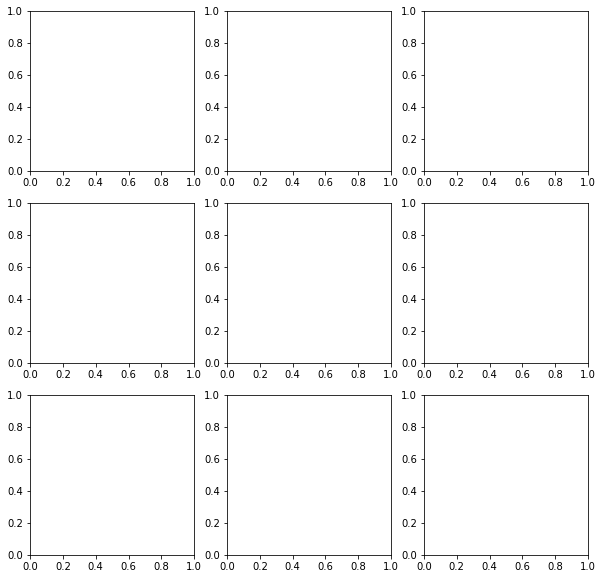

In [25]:
random_select = 16000
veg_type = 'pv'
f_year = '2020'
f_prev_month = '08'

fig, ax = plt.subplots(3,3, figsize=(10,10))

i=0
# for month_model in [3,6,12]:
month_model=3
veg_type='pv'

    # for veg_type in ['pv']:
if month_model == 3:
    f_truth_month = 11  # to delta
    f_truth_year = 2020 # to delta
if month_model == 6:
    f_truth_month = 2  # to delta
    f_truth_year = 2021
if month_model == 12:
    f_truth_month = 8  # to delta
    f_truth_year = 2021

blob_client = BlobServiceClient.from_connection_string(conn_str)
container_client = blob_client.get_container_client("data")
# blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

truth_df = pd.DataFrame()
for blob_name in blob_names:  ## to do random selection instead
    blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
    # df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
    # truth_df = truth_df.append(df)
    unpickled_ds = pkl.loads(blob_client.download_blob().content_as_bytes())
    unpickled_ds['evi'] = 2.5*((unpickled_ds.nbart_nir_1 - unpickled_ds.nbart_red) / (unpickled_ds.nbart_nir_1 + 6*unpickled_ds.nbart_red - 7.5*unpickled_ds.nbart_blue +1))
    da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
    da_df = da.to_dataframe(name='evi').dropna()
    da_df.reset_index(inplace=True)
    da_df.drop_duplicates(subset=['y','x'], keep='first', inplace=True)
    transformer = Transformer.from_crs("EPSG:3577", "EPSG:4326")
    y_4326, x_4326 = transformer.transform(da_df.x.values, da_df.y.values)
    da_df['lat'] = y_4326
    da_df['lon'] = x_4326
    da_df['filename'] = blob_name['name'].split('/')[3][:-7] + '.csv'
    da_df.drop(columns = ['y', 'x'], inplace=True)
    truth_df = truth_df.append(da_df)

# for veg_type in ['pv', 'npv', 'bs']:
last_col_name = f'pred_{month_model}mon'
infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'

blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))

random_df_truth = truth_df   #.sample(n=random_select, replace=False)
random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'}, inplace=True)
# df_infer_compare['lat'] = df_infer_compare['lat'].astype('object')
# df_infer_compare['lon'] = df_infer_compare['lon'].astype('object')

# random_df_truth_compare['lat'] = random_df_truth_compare['lat'].astype('object')
# random_df_truth_compare['lon'] = random_df_truth_compare['lon'].astype('object')

df_infer_compare['lat'] = (df_infer_compare['lat']*1000000).astype('int')
df_infer_compare['lon'] = (df_infer_compare['lon']*1000000).astype('int')

random_df_truth_compare['lat'] = (random_df_truth_compare['lat']*1000000).astype('int')
random_df_truth_compare['lon'] = (random_df_truth_compare['lon']*1000000).astype('int')

df_join_inner = pd.merge(left=random_df_truth_compare, 
                            right=df_infer_compare, how='inner', 
                                            left_on=['filename','lat', 'lon'], 
                                            right_on = ['filename','lat', 'lon'], 
                                            copy=True, indicator=True,
                                            suffixes=('_truth', '_infer'))

# df_join_inner = df_join_inner[~df_join_inner['filename'].str.startswith('YA')]
df_join_inner_clean = df_join_inner.dropna()
# print(df_join_inner_clean)

print('---------')
### Bin EVI values into 4 bands to mimic PCI
# bins = [0, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.55, 0.6]
bins = [0, 0.2, 0.4, 0.6, 0.8]  

names2 = list(range(len(bins)-1))
df_join_inner_clean['pred_band'] = pd.cut(df_join_inner_clean[last_col_name], bins, labels=names2)
df_join_inner_clean['actual_band'] = pd.cut(df_join_inner_clean['evi'], bins, labels=names2)

# print(df_join_inner_clean)
# df_join_inner_clean = df_join_inner_clean.dropna()
# print(df_join_inner_clean.shape)


In [26]:
truth_df

evi        lat         lon                filename
0     0.116121 -22.423816  117.694168  BM; TP; YA_251_251.csv
1     0.099178 -22.423826  117.694266  BM; TP; YA_251_251.csv
2     0.083057 -22.423836  117.694363  BM; TP; YA_251_251.csv
3     0.082779 -22.423846  117.694460  BM; TP; YA_251_251.csv
4     0.089513 -22.423856  117.694558  BM; TP; YA_251_251.csv
...        ...        ...         ...                     ...
4168  0.134240 -22.790926  119.177840          YA_447_449.csv
4169  0.150891 -22.790935  119.177938          YA_447_449.csv
4170  0.165180 -22.790944  119.178036          YA_447_449.csv
4171  0.180084 -22.790953  119.178134          YA_447_449.csv
4172  0.177201 -22.790962  119.178231          YA_447_449.csv

[919330 rows x 4 columns]

In [27]:
df_infer

chainage_name   latitude   longitude    year  month1  month2  month3  \
0      BM_306_310.csv -22.496398  117.243898  2020.0     0.0     0.0     0.0   
1      BM_306_310.csv -22.496409  117.243995  2020.0     0.0     0.0     0.0   
2      BM_306_310.csv -22.496487  117.243887  2020.0     0.0     0.0     0.0   
3      BM_306_310.csv -22.506294  117.235237  2020.0     0.0     0.0     0.0   
4      BM_306_310.csv -22.506304  117.235334  2020.0     0.0     0.0     0.0   
...               ...        ...         ...     ...     ...     ...     ...   
62726  YA_322_326.csv -22.741721  118.275710  2020.0     0.0     0.0     0.0   
62727  YA_322_326.csv -22.741801  118.275602  2020.0     0.0     0.0     0.0   
62728  YA_322_326.csv -22.741810  118.275700  2020.0     0.0     0.0     0.0   
62729  YA_322_326.csv -22.741899  118.275689  2020.0     0.0     0.0     0.0   
62730  YA_322_326.csv -22.741988  118.275679  2020.0     0.0     0.0     0.0   

       month4  month5  month6  ...  tp_prev3     swvl1  swvl1_prev     co2  \
0         0.0     0.0     0.0  ...  0.000470  0.093108    0.090426  409.73   
1         0.0     0.0     0.0  ...  0.000470  0.093080    0.090398  409.73   
2         0.0     0.0     0.0  ...  0.000470  0.093162    0.090477  409.73   
3         0.0     0.0     0.0  ...  0.000471  0.097263    0.094345  409.73   
4         0.0     0.0     0.0  ...  0.000470  0.097223    0.094306  409.73   
...       ...     ...     ...  ...       ...       ...         ...     ...   
62726     0.0     0.0     0.0  ...  0.000352  0.094947    0.098298  409.73   
62727     0.0     0.0     0.0  ...  0.000351  0.094935    0.098281  409.73   
62728     0.0     0.0     0.0  ...  0.000351  0.094967    0.098315  409.73   
62729     0.0     0.0     0.0  ...  0.000351  0.094988    0.098332  409.73   
62730     0.0     0.0     0.0  ...  0.000351  0.095009    0.098349  409.73   

       co2_prev  season_ch_3mon  season_ch_6mon  season_ch_9mon  \
0        411.17        0.013418        0.076090        0.147623   
1        411.17       -0.003415        0.094661        0.207043   
2        411.17        0.019376        0.075005        0.153964   
3        411.17        0.026533        0.050201        0.042664   
4        411.17        0.009043        0.050252        0.046850   
...         ...             ...             ...             ...   
62726    411.17       -0.052158        0.210185        0.220813   
62727    411.17        0.008632        0.152658        0.138775   
62728    411.17       -0.048028        0.169812        0.188663   
62729    411.17       -0.057708        0.117701        0.127989   
62730    411.17       -0.066897        0.141482        0.136394   

       season_ch_12mon  pred_3mon  
0             0.113268   0.202908  
1             0.109473   0.247919  
2             0.124458   0.224631  
3             0.010462   0.121298  
4             0.036612   0.138112  
...                ...        ...  
62726         0.102466   0.330152  
62727         0.067497   0.230784  
62728         0.101704   0.408049  
62729         0.035163   0.361676  
62730         0.034167   0.343784  

[62731 rows x 47 columns]

In [28]:
df_join_inner_clean

filename       lat        lon       evi  pred_3mon  \
0      BM; TP; YA_251_251.csv -22428473  117695665  0.143519   0.158988   
1      BM; TP; YA_251_251.csv -22428562  117695654  0.203788   0.190624   
2      BM; TP; YA_251_251.csv -22429561  117695729  0.124681   0.105885   
3      BM; TP; YA_251_251.csv -22429571  117695826  0.146673   0.132343   
4      BM; TP; YA_251_251.csv -22429650  117695718  0.117974   0.107793   
...                       ...       ...        ...       ...        ...   
62726          YA_442_446.csv -22792757  119174278  0.180851   0.160775   
62727          YA_447_449.csv -22786564  119194030  0.165448   0.166144   
62728          YA_447_449.csv -22786573  119194128  0.160069   0.153407   
62729          YA_447_449.csv -22786653  119194020  0.221480   0.201385   
62730          YA_447_449.csv -22786662  119194118  0.212185   0.214662   

      _merge pred_band actual_band  
0       both         0           0  
1       both         0           1  
2       both         0           0  
3       both         0           0  
4       both         0           0  
...      ...       ...         ...  
62726   both         0           0  
62727   both         0           0  
62728   both         0           0  
62729   both         1           1  
62730   both         1           1  

[62731 rows x 8 columns]

In [30]:
df_join_inner_clean.dropna()

filename       lat        lon       evi  pred_3mon  \
0      BM; TP; YA_251_251.csv -22428473  117695665  0.143519   0.158988   
1      BM; TP; YA_251_251.csv -22428562  117695654  0.203788   0.190624   
2      BM; TP; YA_251_251.csv -22429561  117695729  0.124681   0.105885   
3      BM; TP; YA_251_251.csv -22429571  117695826  0.146673   0.132343   
4      BM; TP; YA_251_251.csv -22429650  117695718  0.117974   0.107793   
...                       ...       ...        ...       ...        ...   
62726          YA_442_446.csv -22792757  119174278  0.180851   0.160775   
62727          YA_447_449.csv -22786564  119194030  0.165448   0.166144   
62728          YA_447_449.csv -22786573  119194128  0.160069   0.153407   
62729          YA_447_449.csv -22786653  119194020  0.221480   0.201385   
62730          YA_447_449.csv -22786662  119194118  0.212185   0.214662   

      _merge pred_band actual_band  
0       both         0           0  
1       both         0           1  
2       both         0           0  
3       both         0           0  
4       both         0           0  
...      ...       ...         ...  
62726   both         0           0  
62727   both         0           0  
62728   both         0           0  
62729   both         1           1  
62730   both         1           1  

[62598 rows x 8 columns]

In [29]:
df_join_inner_clean.sort_values(by='evi')

filename       lat        lon       evi  pred_3mon _merge  \
12471  DD_192_194.csv -21733189  116263688 -0.172714   0.046989   both   
12647  DD_195_197.csv -21733189  116263688 -0.172433   0.061107   both   
34624  PA_373_377.csv -23201272  117692970 -0.128347   0.239163   both   
48484      TP_4_7.csv -20694150  116737044 -0.083216   0.057905   both   
48483      TP_4_7.csv -20693951  116736875 -0.059339   0.059064   both   
...               ...       ...        ...       ...        ...    ...   
46017  TP_284_288.csv -22695104  117783440  1.434291   0.787496   both   
45769  TP_280_284.csv -22695104  117783440  1.434291   0.802681   both   
25898  PA_283_287.csv -22695075  117784037  1.500000   0.770248   both   
45767  TP_280_284.csv -22695075  117784037  1.500000   0.761006   both   
46015  TP_284_288.csv -22695075  117784037  1.500000   0.770248   both   

      pred_band actual_band  
12471         0         NaN  
12647         0         NaN  
34624         1         NaN  
48484         0         NaN  
48483         0         NaN  
...         ...         ...  
46017         3         NaN  
45769       NaN         NaN  
25898         3         NaN  
45767         3         NaN  
46015         3         NaN  

[62731 rows x 8 columns]

(array([6.000e+00, 2.000e+00, 5.000e+00, 3.600e+01, 3.050e+02, 6.230e+02,
        1.010e+03, 1.803e+03, 2.273e+03, 2.148e+03, 1.742e+03, 1.444e+03,
        1.048e+03, 8.250e+02, 5.560e+02, 3.910e+02, 2.790e+02, 1.810e+02,
        1.340e+02, 9.700e+01, 6.500e+01, 5.200e+01, 3.500e+01, 1.900e+01,
        2.400e+01, 9.000e+00, 1.300e+01, 9.000e+00, 9.000e+00, 3.000e+00,
        6.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00]),
 array([-5.93394838e-02, -2.94888522e-02,  3.61779317e-04,  3.02124109e-02,
         6.00630424e-02,  8.99136739e-02,  1.19764305e-01,  1.49614937e-01,
         1.79465569e-01,  2.09316200e-01,  2.39166832e-01,  2.69017463e-01,
         2.98868095e-01,  3.28718726e-01,  3.58569358e-01,  3.88419989e-01,
         4.18270621e-01,  4.48121252e-01,  4.77971884e-01,  5.07822515e-

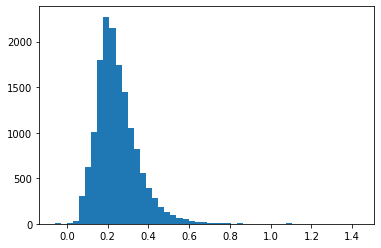

In [17]:
plt.hist(df_join_inner_clean['evi'], bins=50)

In [6]:
random_select = 16000
veg_type = 'pv'
f_year = '2020'
f_prev_month = '08'

fig, ax = plt.subplots(3,3, figsize=(10,10))

i=0
for month_model in [3,6,12]:
    # for veg_type in ['pv']:
    if month_model == 3:
        f_truth_month = 11  # to delta
        f_truth_year = 2020 # to delta
    if month_model == 6:
        f_truth_month = 2  # to delta
        f_truth_year = 2021
    if month_model == 12:
        f_truth_month = 8  # to delta
        f_truth_year = 2021

    blob_client = BlobServiceClient.from_connection_string(conn_str)
    container_client = blob_client.get_container_client("data")
    # blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
    blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

    truth_df = pd.DataFrame()
    for blob_name in blob_names:  ## to do random selection instead
        blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
        # df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
        # truth_df = truth_df.append(df)
        unpickled_ds = pkl.loads(blob_client.download_blob().content_as_bytes())
        unpickled_ds['evi'] = 2.5*((unpickled_ds.nbart_nir_1 - unpickled_ds.nbart_red) / (unpickled_ds.nbart_nir_1 + 6*unpickled_ds.nbart_red - 7.5*unpickled_ds.nbart_blue +1))
        da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
        da_df = da.to_dataframe(name='evi').dropna()
        da_df.reset_index(inplace=True)
        da_df.drop_duplicates(subset=['y','x'], keep='first', inplace=True)
        transformer = Transformer.from_crs("EPSG:3577", "EPSG:4326")
        y_4326, x_4326 = transformer.transform(da_df.x.values, da_df.y.values)
        da_df['lat'] = y_4326
        da_df['lon'] = x_4326
        da_df['filename'] = blob_name['name'].split('/')[3][:-7] + '.csv'
        da_df.drop(columns = ['y', 'x'], inplace=True)
        truth_df = truth_df.append(da_df)

    for veg_type in ['pv', 'npv', 'bs']:
        last_col_name = f'pred_{month_model}mon'
        infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'

        blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
        df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))

        # print(truth_df)

        # truth_df = truth_df[truth_df['filename'].str.startswith('YA')]

        # random_df_truth = truth_df.sample(n=random_select, replace=False)
        # random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
        # df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

        # df_infer_compare = df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'})
        # df_join_inner = random_df_truth_compare.merge(df_infer_compare, how='right', on=['filename','lat', 'lon'], indicator=True)
        # # print(df_join_inner)

        random_df_truth = truth_df   #.sample(n=random_select, replace=False)
        random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
        df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

        df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'}, inplace=True)
        df_infer_compare['lat'] = (df_infer_compare['lat']*1000000).astype('int')
        df_infer_compare['lon'] = (df_infer_compare['lon']*1000000).astype('int')

        random_df_truth_compare['lat'] = (random_df_truth_compare['lat']*1000000).astype('int')
        random_df_truth_compare['lon'] = (random_df_truth_compare['lon']*1000000).astype('int')
                
        df_join_inner = pd.merge(left=random_df_truth_compare, 
                                    right=df_infer_compare, how='inner', 
                                                    left_on=['filename','lat', 'lon'], 
                                                    right_on = ['filename','lat', 'lon'], 
                                                    copy=True, indicator=True,
                                                    suffixes=('_truth', '_infer'))

        # df_join_inner = df_join_inner[~df_join_inner['filename'].str.startswith('YA')]
        df_join_inner_clean = df_join_inner.dropna()
        # print(df_join_inner_clean)

        print('---------')
        ### Bin EVI values into 4 bands to mimic PCI
        # bins = [0, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.55, 0.6]
        bins = [0, 0.2, 0.4, 0.6, 0.8]  

        names2 = list(range(len(bins)-1))
        df_join_inner_clean['pred_band'] = pd.cut(df_join_inner_clean[last_col_name], bins, labels=names2)
        df_join_inner_clean['actual_band'] = pd.cut(df_join_inner_clean['evi'], bins, labels=names2)

        # print(df_join_inner_clean)
        df_join_inner_clean = df_join_inner_clean.dropna()
        print(df_join_inner_clean.shape)

        y_pred = df_join_inner_clean['pred_band'].astype('int')
        y_true = df_join_inner_clean['actual_band'].astype('int')
        # cond = y_pred['pred_band'] > 0
        # acc =  accuracy_score(y_true[cond], y_pred[cond])
        cond = (y_pred > 0) & (y_true > 0)
        acc =  accuracy_score(y_true[cond], y_pred[cond])
        print("Acc: " + veg_type + " " + str(month_model) + " months: " + f'{acc:.2f}')

        r2 = r2_score(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name])
        print("R2: "  + veg_type + " " + str(month_model) + " months: " +  f'{r2:.2f}')

        # ax[i//3, i%3].scatter(df_join_inner['evi'], df_join_inner[f'pred_{month_model}mon'], s=2)
        sns.kdeplot(x='evi', y=last_col_name, data=df_join_inner_clean,
                     cmap="Blues", shade=True,
                     ax=ax[i//3, i%3])
        # filt = df_join_inner_clean['filename'].str.startswith('YA')
        # ax[i//3, i%3].scatter(df_join_inner_clean[filt]['evi'], df_join_inner_clean[filt][last_col_name], s=0.1, c='hotpink', alpha=0.5)
        # ax[i//3, i%3].scatter(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name], s=0.5, c='hotpink')

        ax[i//3, i%3].plot([0, 1.], [0, 1.], c='black')
        ax[i//3, i%3].text(x=0.1, y=0.8, s=f"Acc: {acc:.2f}\nR2: {r2:.2f}")
        ax[i//3, i%3].set_xlabel("Actuals")
        ax[i//3, i%3].set_ylabel("Predictions")
        ax[i//3, i%3].set_xlim(0, 1.)
        ax[i//3, i%3].set_ylim(0, 1.)
        ax[i//3, i%3].set_title(veg_type + " " + str(month_model) + " months")
        i+=1

plt.tight_layout()
plt.show()

/tmp/ipykernel_4381/1645500714.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
/tmp/ipykernel_4381/1645500714.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
/tmp/ipykernel_4381/1645500714.py:33: RuntimeWarning: Mean of empty slice
  da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))


---------
(15134, 8)
Acc: pv 3 months: 0.89
R2: pv 3 months: 0.76
---------
(49726, 8)
Acc: npv 3 months: 0.99
R2: npv 3 months: 0.81
---------
(148726, 8)
Acc: bs 3 months: 0.97
R2: bs 3 months: 0.79
---------
(11970, 8)
Acc: pv 6 months: 0.45
R2: pv 6 months: -0.10
---------
(39867, 8)
Acc: npv 6 months: 0.63
R2: npv 6 months: -0.03
---------
(107040, 8)
Acc: bs 6 months: 0.60
R2: bs 6 months: -0.20


KeyboardInterrupt: 

---------
Acc: pv 12 months: 0.25
R2: pv 12 months: -2.76
---------
Acc: npv 12 months: 0.31
R2: npv 12 months: -4.80
---------
Acc: bs 12 months: 0.65
R2: bs 12 months: -1.60


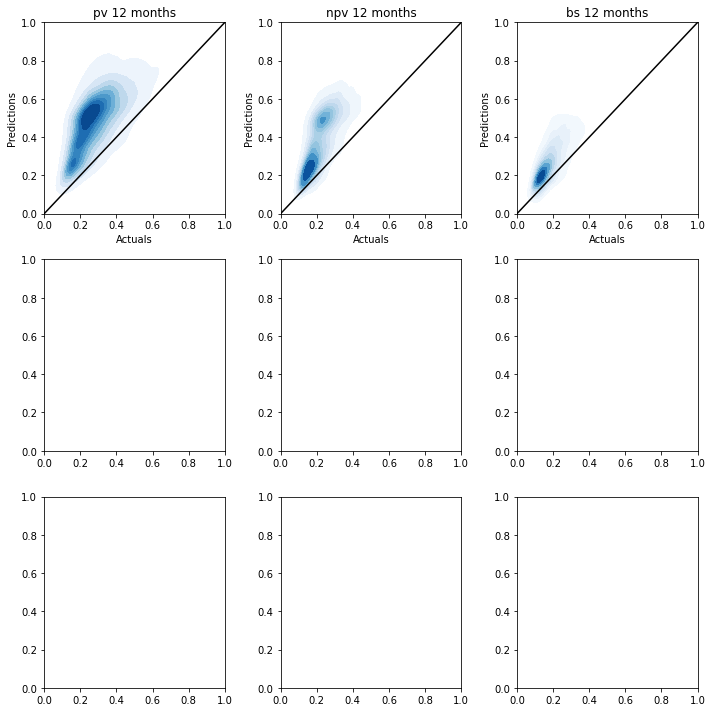

In [3]:
random_select = 16000
veg_type = 'pv'
f_year = '2021'
f_prev_month = '01'

fig, ax = plt.subplots(3,3, figsize=(10,10))

i=0
for month_model in [12]:
# for month_model in [3]:
    # for veg_type in ['pv']:

    for veg_type in ['pv', 'npv', 'bs']:
        last_col_name = f'pred_{month_model}mon'
        if month_model == 3:
            f_truth_month = 4  # to delta
            f_truth_year = 2021 # to delta
        if month_model == 6:
            f_truth_month = 7  # to delta
            f_truth_year = 2021
        if month_model == 12:
            f_truth_month = 1  # to delta
            f_truth_year = 2022
        infer_csvfolder = f'scoringoutput_csv/{f_year}/{f_prev_month}/pred{month_model}_{veg_type}.csv'

        blob_client = get_blob_client(filename=infer_csvfolder, conn_str=conn_str)
        df_infer = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))

        blob_client = BlobServiceClient.from_connection_string(conn_str)
        container_client = blob_client.get_container_client("data")
        blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/fused/{veg_type}_v1/')
        # blob_names = container_client.list_blobs(name_starts_with=f'{f_truth_year}/{int(f_truth_month):02d}/staging/')

        truth_df = pd.DataFrame()
        for blob_name in blob_names:  ## to do random selection instead
            blob_client = get_blob_client(filename=blob_name, conn_str=conn_str)
            df = pd.read_csv(StringIO(blob_client.download_blob().content_as_text()))
            truth_df = truth_df.append(df)
            # unpickled_ds = pkl.loads(blob_client.download_blob().content_as_bytes())
            # unpickled_ds['evi'] = 2.5*((unpickled_ds.nbart_nir_1 - unpickled_ds.nbart_red) / (unpickled_ds.nbart_nir_1 + 6*unpickled_ds.nbart_red - 7.5*unpickled_ds.nbart_blue +1))
            # da = xr.DataArray(coords={'y' : unpickled_ds['y'], 'x' : unpickled_ds['x']}, data=np.nanmean(unpickled_ds['evi'].values.clip(-1.5, 1.5), axis=0))
            # da_df = da.to_dataframe(name='evi').dropna()
            # da_df.reset_index(inplace=True)
            # da_df.drop_duplicates(subset=['y','x'], keep='first', inplace=True)
            # transformer = Transformer.from_crs("EPSG:3577", "EPSG:4326")
            # y_4326, x_4326 = transformer.transform(da_df.x.values, da_df.y.values)
            # da_df['lat'] = y_4326
            # da_df['lon'] = x_4326
            # da_df['filename'] = blob_name['name'].split('/')[3][:-7] + '.csv'
            # da_df.drop(columns = ['y', 'x'], inplace=True)
            # truth_df = truth_df.append(da_df)

        # print(truth_df)

        # truth_df = truth_df[truth_df['filename'].str.startswith('YA')]

        # random_df_truth = truth_df.sample(n=random_select, replace=False)
        # random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
        # df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

        # df_infer_compare = df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'})
        # df_join_inner = random_df_truth_compare.merge(df_infer_compare, how='right', on=['filename','lat', 'lon'], indicator=True)
        # # print(df_join_inner)

        random_df_truth = truth_df   #.sample(n=random_select, replace=False)
        random_df_truth_compare = random_df_truth.loc[:, ['filename', 'lat', 'lon', 'evi']]
        df_infer_compare = df_infer.loc[:, ['chainage_name', 'latitude', 'longitude', last_col_name]]

        df_infer_compare.rename(columns={'chainage_name':'filename', 'latitude':'lat', 'longitude':'lon'}, inplace=True)
        df_infer_compare['lat'] = df_infer_compare['lat'].astype('object')
        df_infer_compare['lon'] = df_infer_compare['lon'].astype('object')

        random_df_truth_compare['lat'] = random_df_truth_compare['lat'].astype('object')
        random_df_truth_compare['lon'] = random_df_truth_compare['lon'].astype('object')
        
        df_join_inner = pd.merge(left=random_df_truth_compare, 
                                    right=df_infer_compare, how='inner', 
                                                    left_on=['filename','lat', 'lon'], 
                                                    right_on = ['filename','lat', 'lon'], 
                                                    copy=True, indicator=True,
                                                    suffixes=('_truth', '_infer'))

        df_join_inner = df_join_inner[~df_join_inner['filename'].str.startswith('YA')]
        df_join_inner_clean = df_join_inner.dropna()
        # print(df_join_inner_clean)

        print('---------')
        ### Bin EVI values into 4 bands to mimic PCI
        # bins = [0, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.55, 0.6]
        bins = [0, 0.2, 0.4, 0.6, 0.8]  

        names2 = list(range(len(bins)-1))
        df_join_inner_clean['pred_band'] = pd.cut(df_join_inner_clean[last_col_name], bins, labels=names2)
        df_join_inner_clean['actual_band'] = pd.cut(df_join_inner_clean['evi'], bins, labels=names2)

        y_pred = df_join_inner_clean['pred_band'].astype('int')
        y_true = df_join_inner_clean['actual_band'].astype('int')
        # cond = y_pred['pred_band'] > 0
        # acc =  accuracy_score(y_true[cond], y_pred[cond])
        cond = (y_pred > 0) & (y_true > 0)
        acc =  accuracy_score(y_true[cond], y_pred[cond])
        print("Acc: " + veg_type + " " + str(month_model) + " months: " + f'{acc:.2f}')

        r2 = r2_score(df_join_inner_clean['evi'], df_join_inner_clean[last_col_name])
        print("R2: "  + veg_type + " " + str(month_model) + " months: " +  f'{r2:.2f}')

        # ax[i//3, i%3].scatter(df_join_inner['evi'], df_join_inner[f'pred_{month_model}mon'], s=2)
        sns.kdeplot(x='evi', y=last_col_name, data=df_join_inner_clean,
                     cmap="Blues", shade=True,
                     ax=ax[i//3, i%3])

        ax[i//3, i%3].plot([0, 1.], [0, 1.], c='black')
        ax[i//3, i%3].set_xlabel("Actuals")
        ax[i//3, i%3].set_ylabel("Predictions")
        ax[i//3, i%3].set_xlim(0, 1.)
        ax[i//3, i%3].set_ylim(0, 1.)
        ax[i//3, i%3].set_title(veg_type + " " + str(month_model) + " months")
        i+=1

plt.tight_layout()
plt.show()

In [ ]:
# pv 3 months: 0.5531839893810333
# npv 3 months: 0.5621766092252563
# bs 3 months: 0.6267140115041288
# pv 6 months: 0.4662621270922428
# npv 6 months: 0.355464558050147
# bs 6 months: 0.3710929018146665
!ls

In [ ]:
filenc = 'era-mon-2015-2021.nc'
ds_env_all = xr.open_dataset(filenc)


In [ ]:
with open('nc_test.pkl','wb') as f:
    pkl.dump(ds_env_all, f)


In [37]:
### help resolve the weird pkl uploding
filep ='nc_test.pkl'
# filep ='2021-01.pkl'
with open(filep, 'rb') as f:
    ds_env = pkl.load(f)
    # ds_env = pkl.loads(filep)

In [35]:
help(scipy.io.netcdf)

Help on module scipy.io.netcdf in scipy.io:

NAME
    scipy.io.netcdf - NetCDF reader/writer module.

DESCRIPTION
    This module is used to read and create NetCDF files. NetCDF files are
    accessed through the `netcdf_file` object. Data written to and from NetCDF
    files are contained in `netcdf_variable` objects. Attributes are given
    as member variables of the `netcdf_file` and `netcdf_variable` objects.
    
    This module implements the Scientific.IO.NetCDF API to read and create
    NetCDF files. The same API is also used in the PyNIO and pynetcdf
    modules, allowing these modules to be used interchangeably when working
    with NetCDF files.
    
    Only NetCDF3 is supported here; for NetCDF4 see
    `netCDF4-python <http://unidata.github.io/netcdf4-python/>`__,
    which has a similar API.

CLASSES
    builtins.object
        netcdf_file
        netcdf_variable
    
    class netcdf_file(builtins.object)
     |  A file object for NetCDF data.
     |  
     |  A `netc